# Notes

1. In sampling theory (also known as ‘frequentist’ or orthodox statistics), one invents estimators of quantities of interest and then chooses between those estimators using some criterion measuring their sampling properties; there is no clear principle for deciding which criterion to use to measure the performance of an estimator; nor, for most criteria, is there any systematic procedure for the construction of optimal estimators

2. In Bayesian inference,in contrast, once we have made explicit all our assumptions about the model and the data, our inferences are mechanical. Whatever question we wish to pose, the rules of probability theory give a unique answer which consistently takes into account all the given information.

3. Human-designed estimators and confidence intervals have no role in Bayesian inference

## Normal likelihoods and normal-inverse-gamma priors

Today we explore how samples from a normal-inverse-gamma (NIG) distribution can be interpreted as normal distributions. Each sample from the NIG distribution specifies the mean and variance of a normal distribution.

This is related to the fact that the NIG distribution is a conjugate prior for the normal likelihood function. In fact, a sample from any conjugate prior can be interpreted as the likelihood function corresponding to that prior.

### Normal-inverse-gamma in SciPy
Even though SciPy does have classes defined for the normal distribution (scipy.stats.norm) and the inverse-gamma distribution (scipy.stats.invgamma), it does not have one defined for the normal-inverse-gamma distribution. To help you, the functions below implement the pdf and a sampler for the normal-inverse-gamma distribution.



In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
'''
Function definitions for the normal-inverse-gamma distribution. The parameters
of the distribution, namely mu, lambda / nu, alpha, beta, are as defined here:

  https://en.wikipedia.org/wiki/Normal-inverse-gamma_distribution

Note that we use the symbol nu (ν) rather than lambda (λ) for the third parameter.
This is to match the notation used in the conjugate priors table on Wikipedia:

  https://en.wikipedia.org/wiki/Conjugate_prior#Table_of_conjugate_distributions
'''

def norminvgamma_pdf(x, sigma2, mu, nu, alpha, beta):
    '''
    The probability density function of the normal-inverse-gamma distribution at
    x (mean) and sigma2 (variance).
    '''
    return (
        stats.norm.pdf(x, loc=mu, scale=np.sqrt(sigma2 / nu)) *
        stats.invgamma.pdf(sigma2, a=alpha, scale=beta))

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    sigma2 = stats.invgamma.rvs(a=alpha, scale=beta, size=size)  # Sample sigma^2 from the inverse-gamma
    x = stats.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)  # Sample x from the normal
    return np.vstack((x, sigma2)).transpose()


### Task 1
Generate 10 samples from the normal-inverse-gamma distribution with parameters as provided below. Each sample corresponds to the mean and variance of a normal distribution.

With these hyperparameters the prior 95% confidence interval for the mean is about [-10, 10] and for the variance [0.1, 10]. In practice you would work the other way around: use confidence intervals to determine values for the prior hyperparameters.

Plot the 10 normal distributions corresponding to your 10 samples. To see the functions clearly, plot your graphs on the domain [-15, 15].

You should see that the 10 samples (normal distributions) are all quite different. This means the prior is quite broad (uncertain) over the mean and variance.

In [46]:
# Normal-inverse-gamma prior hyperparameters# Norma 
mu_0 = 0        # The prior mean is centered around 0.
nu_0 = 0.054    # The smaller nu_0 is, the more uncertain we are about the prior mean.
alpha_0 = 1.12  # alpha and beta govern the marginal prior over the variance.
beta_0 = 0.4

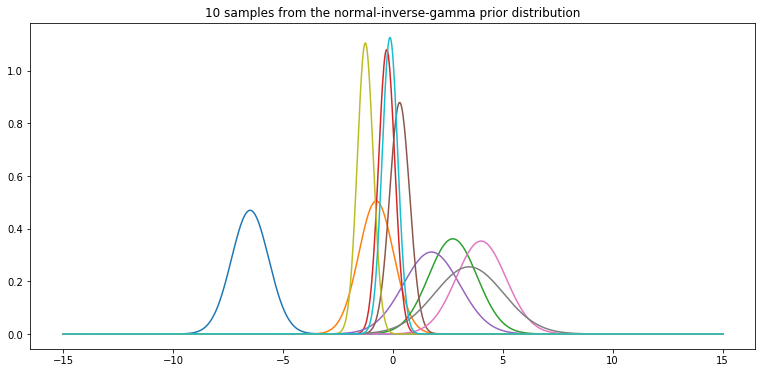

In [47]:
# Plot samples from the prior
sample_num = 10
samples = norminvgamma_rvs(mu_0, nu_0, alpha_0, beta_0, size=sample_num)

plt.figure(figsize=(13, 6))
x = np.linspace(-15, 15, 1000)
for i in range(sample_num):
    y = stats.norm.pdf(x, loc=samples[i, 0], scale=np.sqrt(samples[i, 1]))
    plt.plot(x, y)
plt.title('%i samples from the normal-inverse-gamma prior distribution' %sample_num)
plt.show()



### Task 2
Draw 1,000,000 samples from the normal-inverse-gamma prior above and calculate approximate 95% confidence intervals over the mean and the variance using the samples. You can use the numpy.percentile function for this.

Your confidence intervals should approximately match the intervals [-10, 10] and [0.1, 10].

In [48]:
sample = norminvgamma_rvs(mu_0, nu_0, alpha_0, beta_0, size=1000000)
mean = [sample[i][0] for i in range(len(sample))]
variance = [sample[i][1] for i in range(len(sample))]
print("95% confidence interval for mean is [{:.2f}, {:.2f}]".format(np.percentile(mean, q=2.5), np.percentile(mean, q=97.5)))
print ("95% Confidence interval for variance is [{:.2f}, {:.2f}]".format(np.percentile(variance, q=2.5), np.percentile(variance, q=97.5)))

95% confidence interval for mean is [-9.98, 9.98]
95% Confidence interval for variance is [0.10, 10.01]


In [43]:
samples = norminvgamma_rvs(mu_0, nu_0, alpha_0, beta_0, size=1000000)
print('95% prior confidence intervals:')
print('x: [%.3f, %.3f]' % (
    np.percentile(samples[:,0], 2.5),
    np.percentile(samples[:,0], 97.5)))
print('σ²: [%.3f, %.3f]' % (
    np.percentile(samples[:,1], 2.5),
    np.percentile(samples[:,1], 97.5)))

95% prior confidence intervals:
x: [-9.958, 10.021]
σ²: [0.102, 9.957]


### Task 3
Code the equations for calculating the posterior normal-inverse-gamma hyperparameters from the prior hyperparameters and data.

In [40]:
data = np.array([1, 2, 3, 4])  # In class you will get a larger data set. This is just to get you started.
n = len(data)
x_mean = np.mean(data)
mu_post = (nu_0*mu_0 + n*x_mean) / (nu_0 + n)
nu_post = nu_0 + n
alpha_post = alpha_0 + n/2
beta_post = beta_0 + (sum([(x-x_mean)**2 for x in data]))/2 + (n*nu_0*(x_mean-mu_0)**2)/2*(n+nu_0)
print ("Prior: mu={:.2f}, nu={:.2f}, alpha={:.2f}, beta={:.2f}".format(mu_0, nu_0, alpha_0, beta_0))
print ("Prior: mu={:.2f}, nu={:.2f}, alpha={:.2f}, beta={:.2f}".format(mu_post, nu_post, alpha_post, beta_post))

Prior: mu=0.00, nu=0.05, alpha=1.12, beta=0.40
Prior: mu=2.47, nu=4.05, alpha=3.12, beta=5.64


### Task 4 (optional)
You are told that the prior information we used above is incorrect. Actually, the prior 95% confidence interval on the mean should be [-15, 15] and on the variance [0.5, 2]. So, the prior over the mean is less certain (broader) than we had before, but the prior over the variance is more certain (narrower).

Determine prior hyperparameters for the normal-inverse-gamma distribution that match the prior information above.

In [ ]:
#smaller nu,what about alpha and beta?

In [ ]:
# Normal-inverse-gamma prior hyperparameters# Norma 
mu_0 = 0        # The prior mean is centered around 0.
nu_0 = 0.054    # The smaller nu_0 is, the more uncertain we are about the prior mean.
alpha_0 = 1.12  # alpha and beta govern the marginal prior over the variance.
beta_0 = 0.4